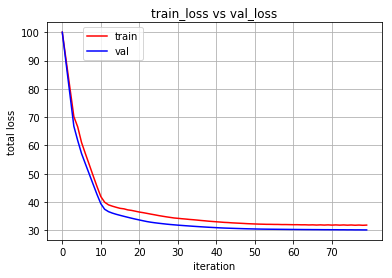

In [2]:
from sklearn import datasets as ds,model_selection as ms,preprocessing as prep

import matplotlib.pyplot as plt
import numpy as np
import scipy
class Lmodel:

    def h_x(x_data,params):
        '''
        f(x)=wx+b
        '''
        total=0.0
        for i in range(len(x_data)):
            total +=x_data[i]*params[i]
        total +=params[len(params)-1]
        return total
    def params_exp(params):
        total=0.0
        for i in range(len(params)-1):
            total +=(params[i]**2)
        return total

    def get_loss(x_data,y_data,C):
        '''
        calculate loss func
        '''
        total_loss=0.0
        for i in range(len(y_data)):
            predict_y=Lmodel.h_x(x_data[i],model_params)
            params_2=Lmodel.params_exp(model_params)

            if ((1-y_data[i]*predict_y)<0):
                temp_hinge_loss=0
            else:
                temp_hinge_loss=1-y_data[i]*predict_y

            total_loss+=temp_hinge_loss
        total_loss=total_loss*C/len(y_data)
        total_loss+=params_2
        return total_loss


    def get_grads(x_data,y_data,C):
        '''
        calculate grads
        '''
        x_grad=[0.0]*len(x_data[0])
        b_grad=0

        
        for i in range(len(y_data)):
            predict_y=Lmodel.h_x(x_data[i],model_params)
            if ((1-predict_y*y_data[i])>=0):
                temp_b_grad=-y_data[i]
                for j in range(len(x_grad)):
                    temp_x_grad=-y_data[i]*x_data[i][j]
                    x_grad[j]+=temp_x_grad
                b_grad+=temp_b_grad
                
        
        for i in range(len(x_grad)):
            x_grad[i]*=(C/len(y_data))
            x_grad[i]+=model_params[i]
        b_grad/=(C/len(y_data))
        return (x_grad,b_grad)


    def update_params(x_grads,b_grad,learning_rate):
        '''
        update w,the parameters
        '''
        for i in range(len(x_grads)):
            model_params[i]+=learning_rate*(-1)*x_grads[i]
        model_params[len(model_params)-1]+=learning_rate*(-1)*b_grad


    def train(iter_num,x_data,y_data,x_data_val,y_data_val,learning_rate,C=0.1):
        '''
        total train process
        '''
        train_loss_arr=[]
        val_loss_arr=[]
        for i in range(iter_num):
            train_loss=Lmodel.get_loss(x_data,y_data,C)
            val_loss=Lmodel.get_loss(x_data_val,y_data_val,C)
            temp_x_grads,b_grad=Lmodel.get_grads(x_data_val,y_data_val,C)
            Lmodel.update_params(temp_x_grads,b_grad,learning_rate)

            train_loss_arr.append(train_loss)
            val_loss_arr.append(val_loss)
        Lmodel.draw_pic(train_loss_arr,val_loss_arr,iter_num)
    

    def draw_pic(train_loss,val_loss,iter_num):
        '''
        draw picture
        '''
        plt.title('train_loss vs val_loss')  
        plt.xlabel('iteration')  
        plt.ylabel('total loss')  
  
        plt.plot(range(iter_num), train_loss,'r', label='train')  
        plt.plot(range(iter_num), val_loss,'b',label='val')  
        plt.xticks(range(0,iter_num,10), rotation=0)  
  
        plt.legend(bbox_to_anchor=[0.3, 1])  
        plt.grid()  
        plt.show()  
    pass

#read origin data
x,y=ds.load_svmlight_file("./australian_scale.txt")
x=x.toarray('c')
#serprate the data
x_train,x_test,y_train,y_test=ms.train_test_split(x,y,test_size=0.33)


model_params=[0.0]*(len(y_test)+1)
#model_params=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13]
#train
iter_num=80
learning_rate=0.001
C=100
Lmodel.train(iter_num,x_train,y_train,x_test,y_test,learning_rate,C)







